In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kibala
Processing Record 2 of Set 1 | dubbo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kapit
Processing Record 5 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | afmadu
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | comodoro rivadavia
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Re

Processing Record 36 of Set 4 | nanortalik
Processing Record 37 of Set 4 | hami
Processing Record 38 of Set 4 | dekoa
City not found. Skipping...
Processing Record 39 of Set 4 | cordoba
Processing Record 40 of Set 4 | scarborough
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | ugra
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | svetlogorsk
Processing Record 46 of Set 4 | kungurtug
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | linqiong
Processing Record 50 of Set 4 | winona
Processing Record 1 of Set 5 | san cristobal
Processing Record 2 of Set 5 | bagdarin
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | camana
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5 | sari
Processing Record 8 of Set 5 | 

Processing Record 27 of Set 8 | hihifo
City not found. Skipping...
Processing Record 28 of Set 8 | wanning
Processing Record 29 of Set 8 | weihe
Processing Record 30 of Set 8 | burlatskoye
Processing Record 31 of Set 8 | issoire
Processing Record 32 of Set 8 | toppenish
Processing Record 33 of Set 8 | dakar
Processing Record 34 of Set 8 | tubruq
City not found. Skipping...
Processing Record 35 of Set 8 | lieksa
Processing Record 36 of Set 8 | bushenyi
Processing Record 37 of Set 8 | pangnirtung
Processing Record 38 of Set 8 | sekoma
Processing Record 39 of Set 8 | wysokie mazowieckie
Processing Record 40 of Set 8 | gigmoto
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | svetlyy
Processing Record 43 of Set 8 | rawson
Processing Record 44 of Set 8 | japura
Processing Record 45 of Set 8 | minna
Processing Record 46 of Set 8 | laupheim
Processing Record 47 of Set 8 | puerto madryn
Processing Record 48 of Set 8 | ngukurr
City not found. Skipping...
Proc

Processing Record 13 of Set 12 | grand gaube
Processing Record 14 of Set 12 | port macquarie
Processing Record 15 of Set 12 | russell
Processing Record 16 of Set 12 | san andres
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | solnechnyy
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | mana
Processing Record 21 of Set 12 | tazovskiy
Processing Record 22 of Set 12 | konevo
Processing Record 23 of Set 12 | labuhan
Processing Record 24 of Set 12 | lima
Processing Record 25 of Set 12 | viedma
Processing Record 26 of Set 12 | aguimes
Processing Record 27 of Set 12 | kourou
Processing Record 28 of Set 12 | olinda
Processing Record 29 of Set 12 | aksarka
Processing Record 30 of Set 12 | san javier
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | hay river
Processing Record 33 of Set 12 | pervomayskoye
Processing Record 34 of Set 12 | cassia
Processing Record 35 of Set 12 | naze
Processing Record 36 of Set 12 | a

In [9]:
len(city_data)

568

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kibala,9.1104,18.3463,80.60,39,0,4.85,TD,2021-04-17 23:55:37
1,Dubbo,-32.2500,148.6167,50.00,44,90,5.75,AU,2021-04-17 23:55:37
2,Albany,42.6001,-73.9662,48.00,71,99,3.85,US,2021-04-17 23:51:39
3,Kapit,2.0167,112.9333,73.02,99,100,1.39,MY,2021-04-17 23:55:38
4,Thompson,55.7435,-97.8558,30.20,69,90,14.97,CA,2021-04-17 23:53:23
5,Sitka,57.0531,-135.3300,53.60,58,75,3.44,US,2021-04-17 23:55:38
6,Atuona,-9.8000,-139.0333,80.64,74,50,19.30,PF,2021-04-17 23:55:39
7,Hobart,-42.8794,147.3294,62.01,58,75,10.36,AU,2021-04-17 23:55:39
8,Vaini,-21.2000,-175.2000,78.80,69,20,11.50,TO,2021-04-17 23:55:40
9,Jamestown,42.0970,-79.2353,42.80,70,90,8.05,US,2021-04-17 23:55:40


In [11]:
city_data_new = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kibala,TD,2021-04-17 23:55:37,9.1104,18.3463,80.60,39,0,4.85
1,Dubbo,AU,2021-04-17 23:55:37,-32.2500,148.6167,50.00,44,90,5.75
2,Albany,US,2021-04-17 23:51:39,42.6001,-73.9662,48.00,71,99,3.85
3,Kapit,MY,2021-04-17 23:55:38,2.0167,112.9333,73.02,99,100,1.39
4,Thompson,CA,2021-04-17 23:53:23,55.7435,-97.8558,30.20,69,90,14.97
5,Sitka,US,2021-04-17 23:55:38,57.0531,-135.3300,53.60,58,75,3.44
6,Atuona,PF,2021-04-17 23:55:39,-9.8000,-139.0333,80.64,74,50,19.30
7,Hobart,AU,2021-04-17 23:55:39,-42.8794,147.3294,62.01,58,75,10.36
8,Vaini,TO,2021-04-17 23:55:40,-21.2000,-175.2000,78.80,69,20,11.50
9,Jamestown,US,2021-04-17 23:55:40,42.0970,-79.2353,42.80,70,90,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

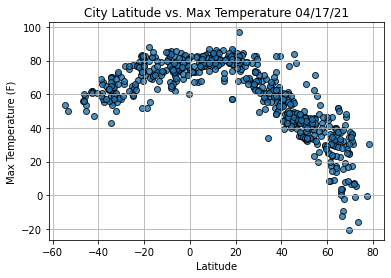

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

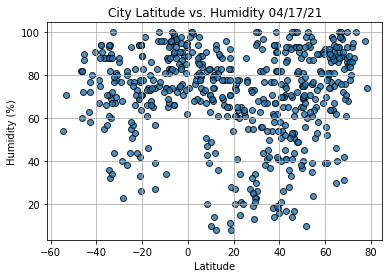

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

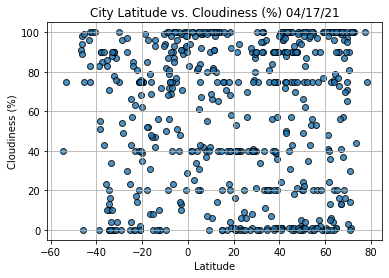

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

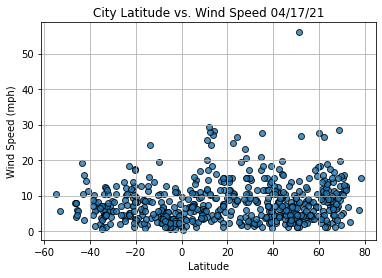

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()